The data is still the housing data. This is a different set of explorations by another dude name Pedra Marcelino. 



# Goal of this notebook

1. Understand the problem. We'll look at each variable and do a philosophical analysis about their meaning and importance for this problem.
2. Univariable study. We'll just focus on the dependent variable ('SalePrice') and try to know a little bit more about it.
3. Multivariate study. We'll try to understand how the dependent variable and independent variables relate.
4. Basic cleaning. We'll clean the dataset and handle the missing data, outliers and categorical variables.
5. Test assumptions. We'll check if our data meets the assumptions required by most multivariate techniques.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
#read the data in
fname='../Python EDA/train.csv'
df_train=pd.read_csv(fname)

In [8]:
df_train.columns.tolist()

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF'

# 1. So... What can we expect?
In order to understand our data, we can look at each variable and try to understand their meaning and relevance to this problem. I know this is time-consuming, but it will give us the flavour of our dataset.

In order to have some discipline in our analysis, we can create an Excel spreadsheet with the following columns:

1. Variable - Variable name.
2. Type - Identification of the variables' type. There are two possible values for this field: 'numerical' or 'categorical'. By 'numerical' we mean variables for which the values are numbers, and by 'categorical' we mean variables for which the values are categories.
3. Segment - Identification of the variables' segment. We can define three possible segments: building, space or location. When we say 'building', we mean a variable that relates to the physical characteristics of the building (e.g. 'OverallQual'). When we say 'space', we mean a variable that reports space properties of the house (e.g. 'TotalBsmtSF'). Finally, when we say a 'location', we mean a variable that gives information about the place where the house is located (e.g. 'Neighborhood').
4. Expectation - Our expectation about the variable influence in 'SalePrice'. We can use a categorical scale with 'High', 'Medium' and 'Low' as possible values.
5. Conclusion - Our conclusions about the importance of the variable, after we give a quick look at the data. We can keep with the same categorical scale as in 'Expectation'.
6. Comments - Any general comments that occured to us.

While 'Type' and 'Segment' is just for possible future reference, the column 'Expectation' is important because it will help us develop a 'sixth sense'. To fill this column, we should read the description of all the variables and, one by one, ask ourselves:

Do we think about this variable when we are buying a house? (e.g. When we think about the house of our dreams, do we care about its 'Masonry veneer type'?).
If so, how important would this variable be? (e.g. What is the impact of having 'Excellent' material on the exterior instead of 'Poor'? And of having 'Excellent' instead of 'Good'?).
Is this information already described in any other variable? (e.g. If 'LandContour' gives the flatness of the property, do we really need to know the 'LandSlope'?).


In [18]:
test=pd.DataFrame([[x,df_train[x].dtype] for x in df_train.columns.tolist()])
test.columns=["Variable","Type"]

In [25]:
test.head()

,Variable,Type
0,Id,int64
1,MSSubClass,int64
2,MSZoning,object
3,LotFrontage,float64
4,LotArea,int64


In [30]:
fname1="../Python EDA/Col Descriptions.csv"
description=pd.read_csv(fname1,header=None)
description.head()

,0,1
0,SalePrice,the property's sale price in dollars. This is ...
1,MSSubClass,The building class
2,MSZoning,The general zoning classification
3,LotFrontage,Linear feet of street connected to property
4,LotArea,Lot size in square feet


In [31]:
description.columns=["Variable","Description"]
description.head()

,Variable,Description
0,SalePrice,the property's sale price in dollars. This is ...
1,MSSubClass,The building class
2,MSZoning,The general zoning classification
3,LotFrontage,Linear feet of street connected to property
4,LotArea,Lot size in square feet


In [34]:
test.set_index("Variable").head()

,Type
Variable,
Id,int64
MSSubClass,int64
MSZoning,object
LotFrontage,float64
LotArea,int64


In [50]:
test["Variable"].dtype

dtype('O')

In [35]:
description.set_index("Variable").head()

,Description
Variable,
SalePrice,the property's sale price in dollars. This is ...
MSSubClass,The building class
MSZoning,The general zoning classification
LotFrontage,Linear feet of street connected to property
LotArea,Lot size in square feet


In [51]:
#Joins the two data frame together 
result=description.merge(test,on="Variable") #I used join before but still don't know how this works but the other doesn't
result.head()

,Variable,Description,Type
0,SalePrice,the property's sale price in dollars. This is ...,int64
1,MSSubClass,The building class,int64
2,MSZoning,The general zoning classification,object
3,LotFrontage,Linear feet of street connected to property,float64
4,LotArea,Lot size in square feet,int64


In [54]:
result["Segment"]=""
result["Expectation"]=""
result["Conclusion"]=""
result=pd.DataFrame(

,Variable,Description,Type,Segment,Expectation,Conclusion
0,SalePrice,the property's sale price in dollars. This is ...,int64,,,
1,MSSubClass,The building class,int64,,,
2,MSZoning,The general zoning classification,object,,,
3,LotFrontage,Linear feet of street connected to property,float64,,,
4,LotArea,Lot size in square feet,int64,,,


In [58]:
result.to_csv("result.csv") 
#To go through the same exercise that the author did 

# First things first: analysing 'SalePrice'
'SalePrice' is the reason of our quest. It's like when we're going to a party. We always have a reason to be there. Usually, women are that reason. (disclaimer: adapt it to men, dancing or alcohol, according to your preferences)

Using the women analogy, let's build a little story, the story of 'How we met 'SalePrice''.

Everything started in our Kaggle party, when we were looking for a dance partner. After a while searching in the dance floor, we saw a girl, near the bar, using dance shoes. That's a sign that she's there to dance. We spend much time doing predictive modelling and participating in analytics competitions, so talking with girls is not one of our super powers. Even so, we gave it a try:

'Hi, I'm Kaggly! And you? 'SalePrice'? What a beautiful name! You know 'SalePrice', could you give me some data about you? I just developed a model to calculate the probability of a successful relationship between two people. I'd like to apply it to us!'

In [60]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

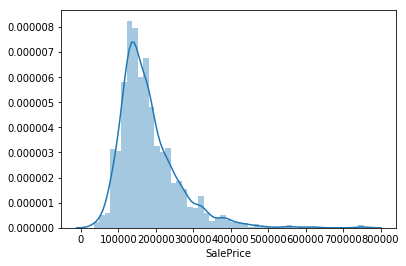

In [61]:
#Histogram to see distribution of the sale price
sns.distplot(df_train['SalePrice'])

In [62]:
#Skewness and kurtosis
print("Skewness: %f" % df_train["SalePrice"].skew())
print("Kurtosis: %f" % df_train["SalePrice"].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


# Relationship between Saleprice and other variables

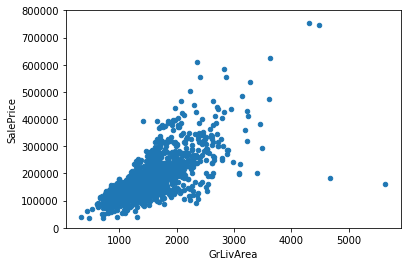

In [65]:
#scatter plot grlivarea/saleprice
var='GrLivArea'
data=pd.concat([df_train['SalePrice'],df_train[var]],axis=1)
data.plot.scatter(x=var,y='SalePrice',ylim=(0,800000))
#From the plot we can see that the relationship is linear

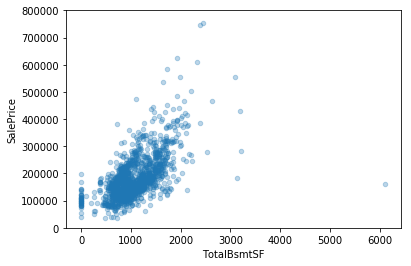

In [71]:
#Scatter plot to show the relatiopnship between basement area and the saleprice
var='TotalBsmtSF'
data=pd.concat([df_train['SalePrice'],df_train[var]],axis=1)
data.plot.scatter(x=var,y='SalePrice',ylim=(0,800000),alpha=0.3)
#The relationship also seems to be very linear

# Relationship with Categorical features


(-0.5, 9.5, 0, 800000)

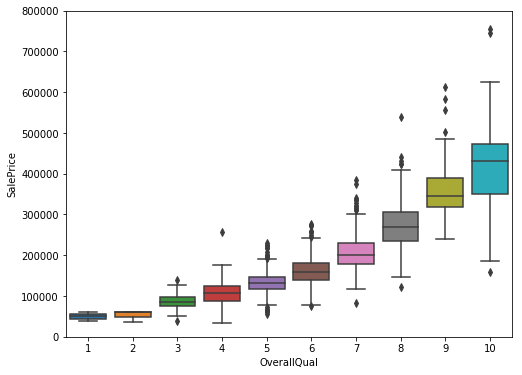

In [72]:
#Box plot overallqual/saleprice
var='OverallQual'
data=pd.concat([df_train['SalePrice'],df_train[var]],axis=1)
f,ax=plt.subplots(figsize=(8,6))
fig=sns.boxplot(x=var,y='SalePrice',data=data)
fig.axis(ymin=0,ymax=800000)


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 <a list of 112 Text xticklabel objects>)

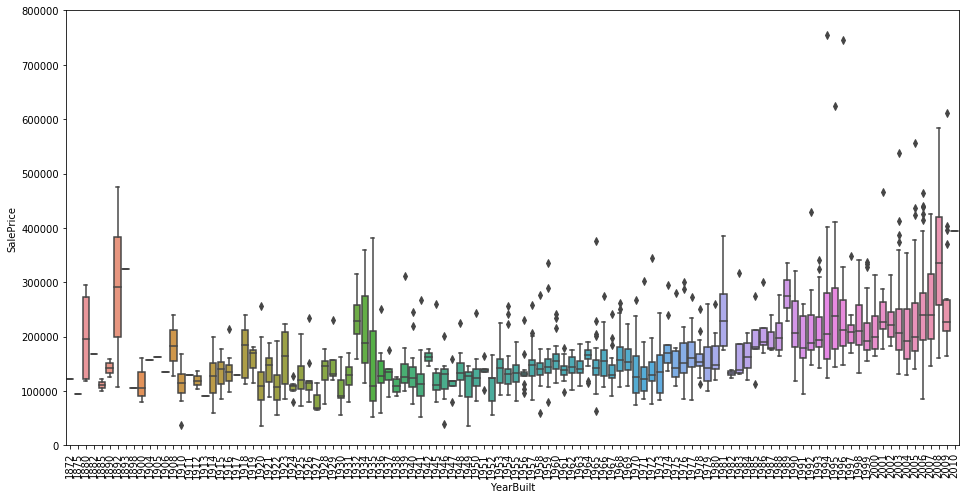

In [75]:
var="YearBuilt"
data=pd.concat([df_train["SalePrice"],df_train[var]],axis=1)
f,ax=plt.subplots(figsize=(16,8))
fig=sns.boxplot(x=var,y="SalePrice",data=data)
fig.axis(ymin=0,ymax=800000)
plt.xticks(rotation=90)

In [76]:
#There seems to be a strong tendency for the newer buildings to be solde with a higher price


In summary

Stories aside, we can conclude that:

'GrLivArea' and 'TotalBsmtSF' seem to be linearly related with 'SalePrice'. Both relationships are positive, which means that as one variable increases, the other also increases. In the case of 'TotalBsmtSF', we can see that the slope of the linear relationship is particularly high.
'OverallQual' and 'YearBuilt' also seem to be related with 'SalePrice'. The relationship seems to be stronger in the case of 'OverallQual', where the box plot shows how sales prices increase with the overall quality.
We just analysed four variables, but there are many other that we should analyse. The trick here seems to be the choice of the right features (feature selection) and not the definition of complex relationships between them (feature engineering).

That said, let's separate the wheat from the chaff.

# Keep calm and work smart
Until now we just followed our intuition and analysed the variables we thought were important. In spite of our efforts to give an objective character to our analysis, we must say that our starting point was subjective.

As an engineer, I don't feel comfortable with this approach. All my education was about developing a disciplined mind, able to withstand the winds of subjectivity. There's a reason for that. Try to be subjective in structural engineering and you will see physics making things fall down. It can hurt.

So, let's overcome inertia and do a more objective analysis.


Making sense of all the features
1. Correlation matrix (heatmap style)
2. SalePrice correlation matrix ( zoomed heatmap)
3. Scatter plots between the most correlated variables 

### Correlation matrix (heat map style)


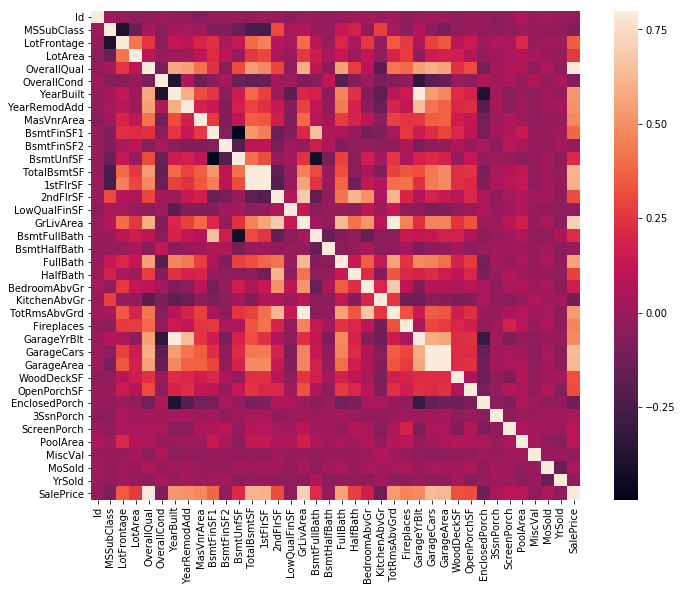

In [77]:
corrmat=df_train.corr()
f,ax=plt.subplots(figsize=(12,9))
sns.heatmap(corrmat,vmax=0.8,square=True)

In my opinion, this heatmap is the best way to get a quick overview of our 'plasma soup' and its relationships. (Thank you @seaborn!)

At first sight, there are two red colored squares that get my attention. The first one refers to the 'TotalBsmtSF' and '1stFlrSF' variables, and the second one refers to the 'GarageX' variables. Both cases show how significant the correlation is between these variables. Actually, this correlation is so strong that it can indicate a situation of multicollinearity. If we think about these variables, we can conclude that they give almost the same information so multicollinearity really occurs. Heatmaps are great to detect this kind of situations and in problems dominated by feature selection, like ours, they are an essential tool.

Another thing that got my attention was the 'SalePrice' correlations. We can see our well-known 'GrLivArea', 'TotalBsmtSF', and 'OverallQual' saying a big 'Hi!', but we can also see many other variables that should be taken into account. That's what we will do next.

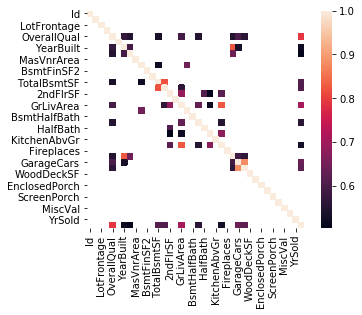

In [99]:
sns.heatmap(corrmat[(corrmat>0.5) | (corrmat<-0.5)],square=True)